In [1]:
import torch
from torch.autograd import Variable
import numpy as np
import pylab as pl
import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
dtype = torch.FloatTensor

In [3]:
np.random.seed(1)

In [4]:
Input, Hidden, Output = 7, 6, 1
time_steps = 10
lr = 0.2
series = np.linspace(2, 5, time_steps)
y = np.sin(series)
y.resize((time_steps, 1))
x = Variable(torch.Tensor(y[:-1]).type(dtype), requires_grad=False)
y = Variable(torch.Tensor(y[1:]).type(dtype), requires_grad=False)

In [5]:
lim = np.sqrt(6) / (np.sqrt(Input + Hidden))
w1 = np.random.uniform(-lim, lim, [Input, Hidden])
w1 = Variable(torch.from_numpy(w1).type(dtype), requires_grad=True)
lim = np.sqrt(6) / (np.sqrt(Output + Hidden))
w2 = np.random.uniform(-lim, lim, [Hidden, Output])
w2 = Variable(torch.from_numpy(w2).type(dtype), requires_grad=True)
hidden_prev = torch.zeros((1, Hidden)).type(dtype)

In [6]:
def forward(x, w1, w2):
  h = torch.tanh(Variable(x).mm(w1))
  return   (h.mm(w2), h)

In [13]:
for iter in range(3000):

  i = iter % x.size(0)
  variable_y = y[i:(i+1)]
  current_x = x[i:(i+1)].data
  xh = torch.cat([current_x, hidden_prev], 1)
  variable_x = xh

  variable_h = hidden_prev

  (y_pred, h) = forward(variable_x, w1, w2)
  loss = (y_pred - variable_y).pow(2).sum() /2
  if iter % 200 == 0:       
    print("Iteration: {} loss {}".format(iter, loss.data[0]))

  loss.backward()

  w1.data -= lr * w1.grad.data
  w2.data -= lr * w2.grad.data

  w1.grad.data.zero_()
  w2.grad.data.zero_()

  hidden_prev = h.data


Iteration: 0 loss 0.0057675656862556934
Iteration: 200 loss 7.655515901205945e-07
Iteration: 400 loss 1.2261809388292022e-05
Iteration: 600 loss 0.00013975623005535454
Iteration: 800 loss 0.0001224095467478037
Iteration: 1000 loss 7.547299105681304e-07
Iteration: 1200 loss 5.98442511545727e-06
Iteration: 1400 loss 3.1797317205928266e-05
Iteration: 1600 loss 0.0005339903873391449
Iteration: 1800 loss 1.7459348100601346e-07
Iteration: 2000 loss 3.833439166101016e-07
Iteration: 2200 loss 9.974828572012484e-06
Iteration: 2400 loss 0.00013274239609017968
Iteration: 2600 loss 8.3095786976628e-05
Iteration: 2800 loss 6.989023972892028e-07


In [10]:
predictions = []
for index, inp in enumerate(x):
  xh = torch.cat([inp.view(1, 1).data, hidden_prev], 1)  
  (pred, hidden_prev) = forward(xh, w1, w2)
  hidden_prev = hidden_prev.data
  predictions.append(pred.data.numpy().ravel()[0])

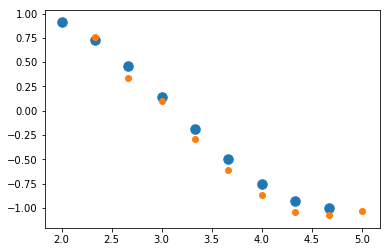

In [11]:
pl.scatter(series[:-1] , x.data.numpy(), s=90)
pl.scatter(series[1:], predictions)
pl.show()